In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("titanic_train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


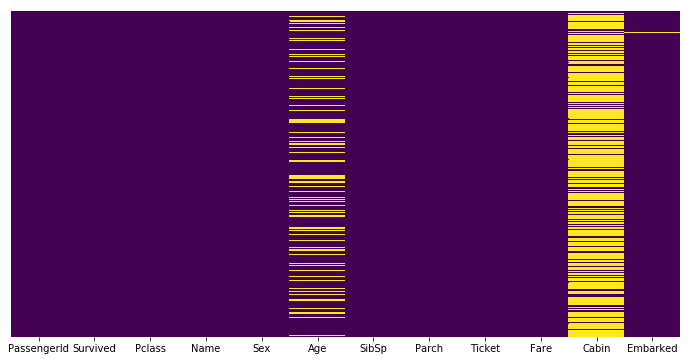

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [8]:
sns.set_style('whitegrid')

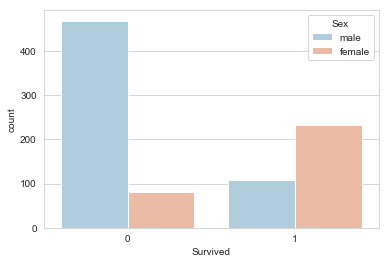

In [12]:
sns.countplot(x='Survived', data = train, hue = 'Sex', palette='RdBu_r')

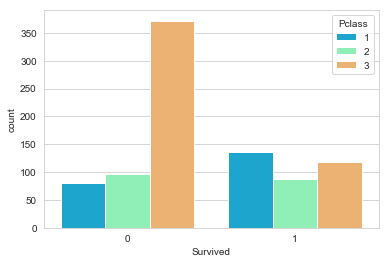

In [14]:
sns.countplot(x='Survived', data = train, hue = 'Pclass', palette='rainbow')

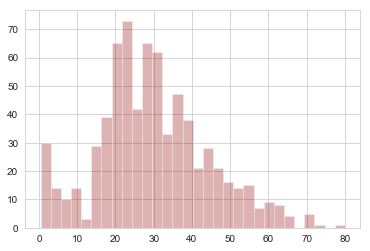

In [19]:
train['Age'].hist(bins =30, color = 'darkred', alpha =0.3)

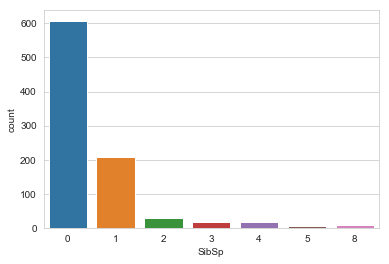

In [20]:
sns.countplot(x='SibSp', data = train)

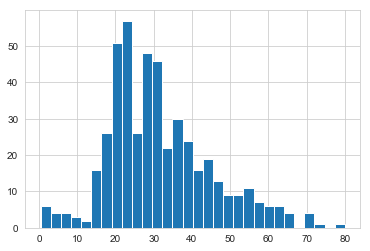

In [22]:
train[train['SibSp']==0]['Age'].hist(bins =30)

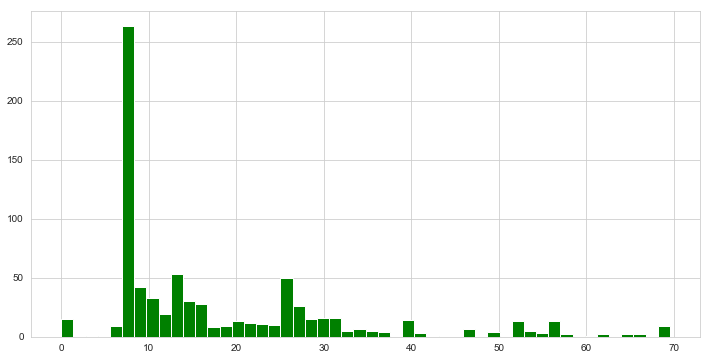

In [24]:
train[train['Fare']<70]['Fare'].hist(color='green', bins =50, figsize=(12,6) )

Tratando dados faltantes

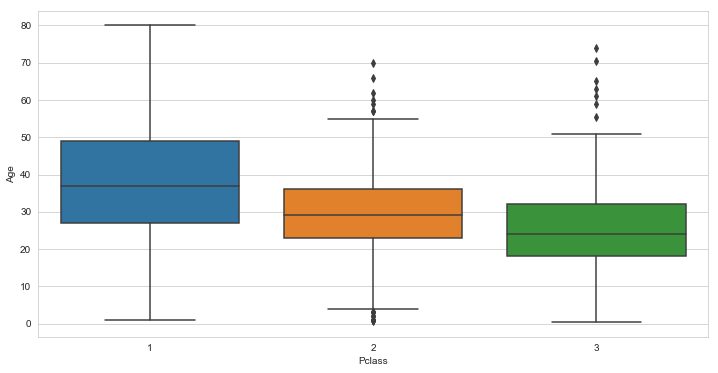

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Pclass', y = 'Age', data= train)

In [28]:
def inputar_idade(cols):
    Idade = cols[0]
    Classe = cols[1]
    if pd.isnull(Idade):
        if Classe == 1:
            return 37
        elif Classe == 2:
            return 29
        else:
            return 24
    else:
        return Idade

In [29]:
train['Age'] = train[['Age','Pclass']].apply(inputar_idade, axis=1)

In [30]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      24.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     29.0
18     31.0
19     24.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     24.0
27     19.0
28     24.0
29     24.0
       ... 
861    21.0
862    48.0
863    24.0
864    24.0
865    42.0
866    27.0
867    31.0
868    24.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    24.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

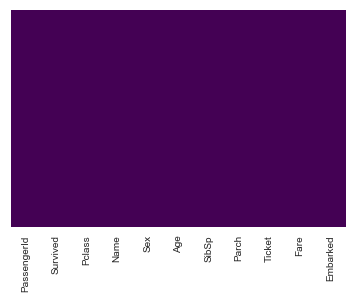

In [34]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [32]:
del train['Cabin']
#train.drop('Cabin', inplace = True)

In [33]:
train.dropna(inplace=True)

In [36]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [40]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [42]:
train.drop(['Sex','PassengerId','Name','Ticket'], axis =1, inplace = True)

In [43]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S


In [44]:
train = pd.concat([train, sex, embark], axis =1)

In [45]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1


In [46]:
del train['Embarked']

In [47]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis =1), train['Survived'], test_size =0.3)

In [52]:
logmodel = LogisticRegression()

In [55]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
prections = logmodel.predict(X_test)

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test, prections))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       161
           1       0.73      0.69      0.71       106

   micro avg       0.78      0.78      0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267



In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
print(confusion_matrix(y_test, prections))

[[134  27]
 [ 33  73]]
